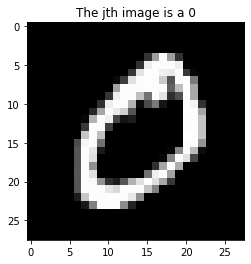

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn import preprocessing
from scipy.io import arff
import matplotlib.pyplot as plt


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# plot one digital image
j = 1
plt.title('The jth image is a {label}'.format(label=int(y[j]))) 
plt.imshow(X[j].reshape((28,28)), cmap='gray')
plt.show()

#Preprocessing: scale data with zero mean and unit variance
X = preprocessing.scale(X)

In [2]:
# Extract out the digits "4" and "9"
X4 = X[y=='4',:]
X9 = X[y=='9',:]
y4 = 4*np.ones((len(X4),), dtype=int)
y9 = 9*np.ones((len(X9),), dtype=int)

In [3]:
# split the data into test and train (which further splitted into train and validation)

X_train = np.concatenate((X4[0:3000], X9[0:3000]), axis=0)
Y_train = np.concatenate((y4[0:3000], y9[0:3000]), axis=0)
X_validation = np.concatenate((X4[3000:4000], X9[3000:4000]), axis=0)
Y_validation = np.concatenate((y4[3000:4000], y9[3000:4000]), axis=0)
X_test = np.concatenate((X4[4000:], X9[4000:]), axis=0)
Y_test = np.concatenate((y4[4000:], y9[4000:]), axis=0)

In [7]:
C_grid = np.logspace(-3, 3, 5)
print(C_grid)

[1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]


In [18]:
Pe_val = np.zeros((5,5))

from sklearn import svm
for i in range (5):
    for j in range (5):
        clf= svm.SVC(C=C_grid[i],kernel='rbf', gamma = C_grid[j])
        clf.fit(X_train,Y_train)
        Pe_val[i][j] = 1 - clf.score(X_validation,Y_validation)
        print("Error for iteration is:",i,j,Pe_val[i][j])
        print("*****************")

Error for iteration is: 0 0 0.10650000000000004
*****************
Error for iteration is: 0 1 0.41400000000000003
*****************
Error for iteration is: 0 2 0.5
*****************
Error for iteration is: 0 3 0.5
*****************
Error for iteration is: 0 4 0.5
*****************
Error for iteration is: 1 0 0.055499999999999994
*****************
Error for iteration is: 1 1 0.41400000000000003
*****************
Error for iteration is: 1 2 0.5
*****************
Error for iteration is: 1 3 0.5
*****************
Error for iteration is: 1 4 0.5
*****************
Error for iteration is: 2 0 0.020000000000000018
*****************
Error for iteration is: 2 1 0.21550000000000002
*****************
Error for iteration is: 2 2 0.5
*****************
Error for iteration is: 2 3 0.5
*****************
Error for iteration is: 2 4 0.5
*****************
Error for iteration is: 3 0 0.013000000000000012
*****************
Error for iteration is: 3 1 0.20399999999999996
*****************
Error for iteration

[[0.1065 0.414  0.5    0.5    0.5   ]
 [0.0555 0.414  0.5    0.5    0.5   ]
 [0.02   0.2155 0.5    0.5    0.5   ]
 [0.013  0.204  0.4985 0.5    0.5   ]
 [0.012  0.204  0.4985 0.5    0.5   ]]


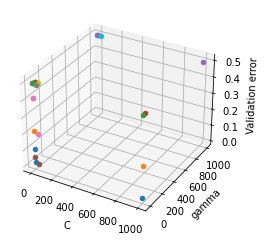

<Figure size 432x288 with 0 Axes>

In [29]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(Pe_val)
fig = plt.figure()
ax = plt.axes(projection ='3d')

z = Pe_val
x = C_grid
y = C_grid

# plotting
fig = plt.figure()
for i in range (5):
    for j in range (5):
        z[i][j] = Pe_val[i][j]
        #ax.plot3D(x[i], y[j], z[i][j], 'blue')
        ax.scatter(x[i], y[j], z[i][j])


        
ax.set_xlabel("C")
ax.set_ylabel("gamma")
ax.set_zlabel("Validation error")
plt.show()     




In [10]:
X_train_val = np.concatenate((X4[0:4000], X9[0:4000]), axis=0)
Y_train_val = np.concatenate((y4[0:4000], y9[0:4000]), axis=0)

clf= svm.SVC(C=C_grid[4],kernel='rbf', gamma =C_grid[0] )
clf.fit(X_train_val,Y_train_val)

Pe = 1 - clf.score(X_test,Y_test)

In [30]:
print("Error for RBF kernel is:",Pe)
print("Best value of C is:", C_grid[4])
print("Best value for gamma is:", C_grid[0])

Error for RBF kernel is: 0.014873746108612917
Best value of C is: 1000.0
Best value for gamma is: 0.001
